In [1]:
import ZMX
from raytrace import raytrace, coords, lprint
import numpy as np
import ceo
#from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
#import plotly.plotly as py       
#import plotly.graph_objs as go
#init_notebook_mode()
%pylab inline

from __future__ import print_function

Populating the interactive namespace from numpy and matplotlib


In [2]:
reload(ZMX)
D = np.double(0.03)
nPx = 50
src  = ceo.Source("R",rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,0.00],)
xyz = []
xyz = [src.rays.coordinates.host()]

In [3]:
ZmxModel = ZMX.ZemaxModel("ZmxFiles/ceo-zernikefringetest.zmx", src)

S          = ZmxModel.surfaces[1:]
GlassIndex = ZmxModel.GlassIndex

[ZMX.update_material(s, GlassIndex) for s in S]
[raytrace(src,S,k+1,xyz) for k in range(len(S))]

Processing:  VERS ( 200121,89,104749,L104749 )
Processing:  MODE ( SEQ )
Processing:  NAME (  )
Processing:  PFIL ( 0,0,0 )
Processing:  LANG ( 0 )
Processing:  UNIT ( MM,X,W,X,CM,MR,CPMM )
Processing:  ENPD ( 10 )
Processing:  ENVD ( 20,1,0 )
Processing:  GFAC ( 0,0 )
Processing:  GCAT ( SCHOTT )
Processing:  RAIM ( 0,0,1,1,0,0,0,0,0,1 )
Processing:  PUSH ( 0,0,0,0,0,0 )
Processing:  SDMA ( 0,1,0 )
Processing:  OMMA ( 1,1 )
Processing:  FTYP ( 0,0,1,1,0,0,0,1 )
Processing:  ROPD ( 2 )
Processing:  HYPR ( 0 )
Processing:  PICB ( 1 )
Processing:  XFLN ( 0 )
Processing:  YFLN ( 0 )
Processing:  FWGN ( 1 )
Processing:  VDXN ( 0 )
Processing:  VDYN ( 0 )
Processing:  VCXN ( 0 )
Processing:  VCYN ( 0 )
Processing:  VANN ( 0 )
Processing:  WAVM ( 1,0.55000000000000004,1 )
Processing:  WAVM ( 2,0.55000000000000004,1 )
Processing:  WAVM ( 3,0.55000000000000004,1 )
Processing:  WAVM ( 4,0.55000000000000004,1 )
Processing:  WAVM ( 5,0.55000000000000004,1 )
Processing:  WAVM ( 6,0.550000000000000

[None, None]

In [30]:
lprint(coords(xyz, 17, 0))
print 
lprint(coords(xyz, 17, 1))
print
lprint(coords(xyz, 17, 2))

-0.004591836734693877
-0.004591836734693877
-0.004591836734693877
-0.004472272629608824
0.00017122759870687277

-0.015
-0.015
-0.015
-0.014609423923388825
0.0005593434891091177

0.0
0.0
0.10123808914666589
0.1088259252936858
0.20500000000000002


2500


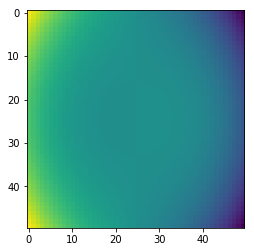

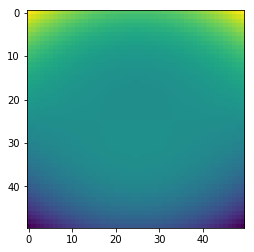

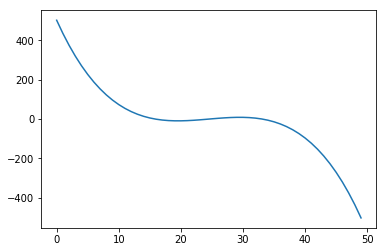

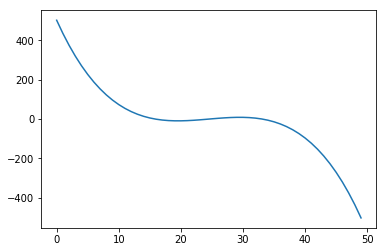

In [33]:
print(nPx*nPx)
import pylab as pl
rayx = np.array([coords(xyz, i, 0)[-1] for i in range(nPx*nPx)]).reshape((nPx,nPx)) * 1.0e6
rayy = np.array([coords(xyz, i, 1)[-1] for i in range(nPx*nPx)]).reshape((nPx,nPx)) * 1.0e6
pl.imshow(rayx)
pl.figure()
pl.imshow(rayy)
pl.figure()
pl.plot(rayx[nPx//2])
pl.figure()
pl.plot(rayy[:,nPx//2])

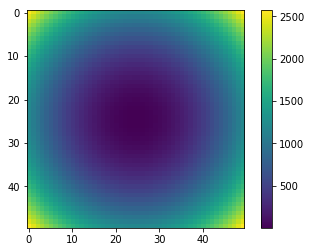

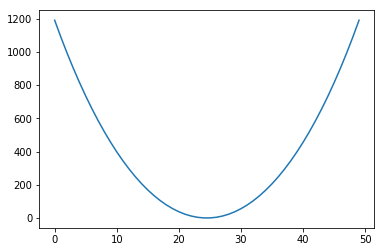

In [38]:
wavefront = src.rays.optical_path_difference.host(units='micron').reshape(nPx,nPx)
plt.imshow(wavefront)
plt.colorbar()
plt.figure()
plt.plot(wavefront[nPx//2])

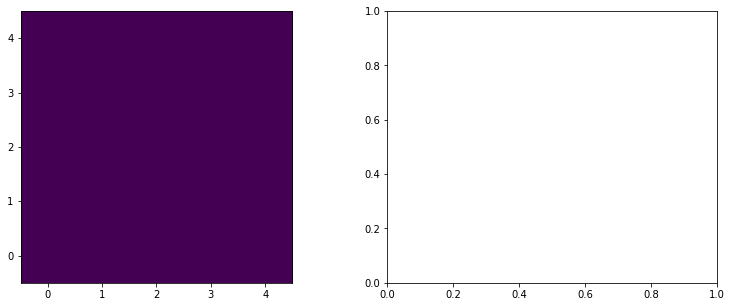

In [9]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(13,5)
wavefront = src.phase.host(units='nm')
h1 = ax1.imshow(src.phase.host(units='nm'),origin='lower')
#src.wavefront.rms()
#ax1.set_title('WFE RMS: %.3fnm'%src.wavefront.rms(-9))

In [10]:
wavefront

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]
[ (2,1) x1,y2 ]  [ (2,2) x2,y2 ]



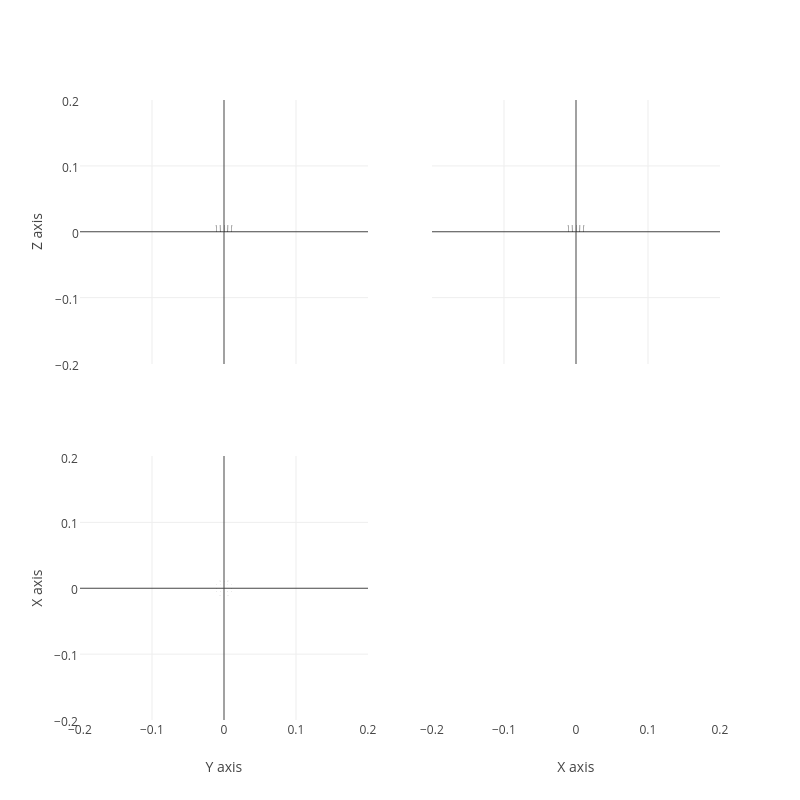

In [5]:
from plotly import tools
fig = tools.make_subplots(rows=2, cols=2, shared_xaxes=True, shared_yaxes=True)
h = []
for k in range(nPx**2):
    h = go.Scatter(x=coords(xyz,k,1),y=coords(xyz,k,2) ,
            mode='lines',showlegend=False, 
            line=dict(width=1,color='rgb(0.2,0.2,0.2'),opacity=0.1 )
    fig.append_trace(h, 1, 1)
    h = go.Scatter(x=coords(xyz,k,0),y=coords(xyz,k,2) ,
            mode='lines',showlegend=False, 
            line=dict(width=1,color='rgb(0.2,0.2,0.2'),opacity=0.1 )
    fig.append_trace(h, 1, 2)
    h = go.Scatter(x=coords(xyz,k,1),y=coords(xyz,k,0) ,
            mode='lines',showlegend=False, 
            line=dict(width=1,color='rgb(0.2,0.2,0.2'),opacity=0.1 )
    fig.append_trace(h, 2, 1)
#data = go.Data(h)
fig['layout']['yaxis1'].update(range=[-0.2, 0.2],title='Z axis')
fig['layout']['yaxis2'].update(range=[-0.2, 0.2],title='X axis')
fig['layout']['xaxis1'].update(range=[-0.2, 0.2],title='Y axis')
fig['layout']['xaxis2'].update(range=[-0.2, 0.2],title='X axis')
fig['layout'].update(width=800,height=800)
#iplot(fig)
py.image.ishow(fig)